In [ ]:
# Importação das bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importação do dataset de imagens de vestuário do servidor do Keras
fashion_mnist = keras.datasets.fashion_mnist

# Divisão das imagens de entrada e saídas desejadas, treino e teste.
(X_treino, d_treino), (X_teste, d_teste) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Para facilitar a identificação das classes, atribui-se um nome para cada saída
nome_classes = ['Camiseta', 'Calça', 'Blusa', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

In [ ]:
# Exploração do dataset de treino e teste
X_treino.shape

(60000, 28, 28, 1)

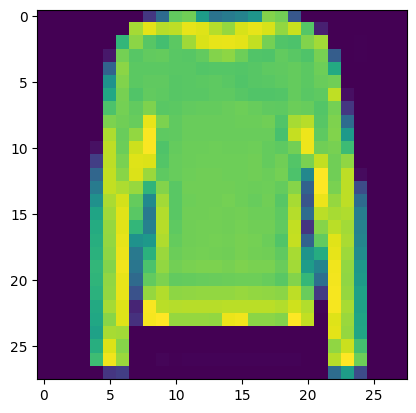

In [ ]:
# Plotagem de algumas imagens de treino (de 0 a 59999) e teste (de 0 a 9999)
plt.figure()
plt.imshow(X_teste[99])
plt.show()

In [ ]:
# Verificação do rótulo de algumas imagens de treino e teste
nome_classes[d_teste[99]]

'Blusa'

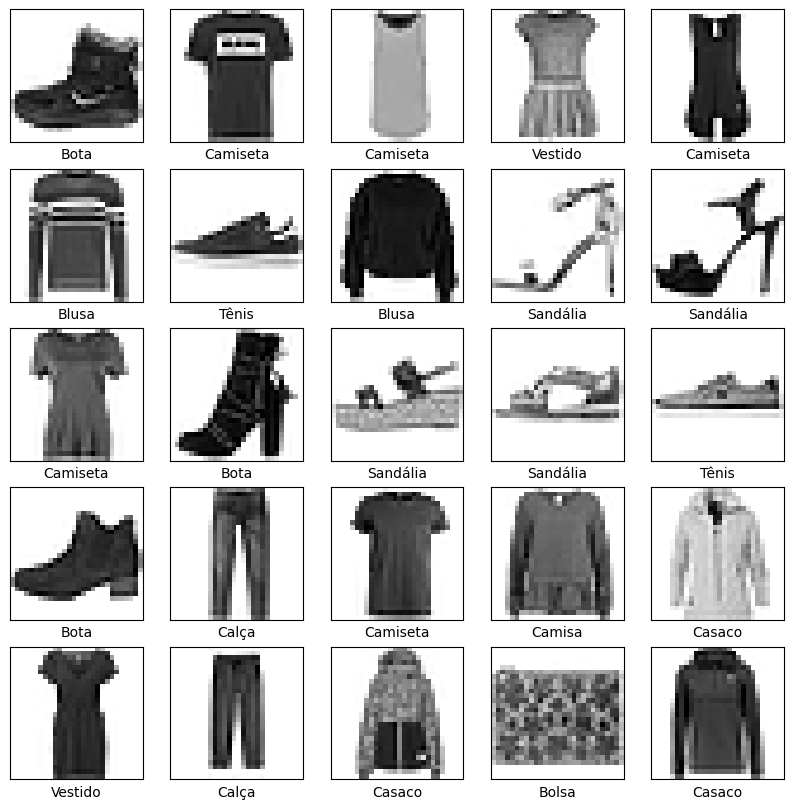

In [ ]:
# Plotagem de algumas imagens e seus rótulos
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_treino[i], cmap=plt.cm.binary)
    plt.xlabel(nome_classes[d_treino[i]])
plt.show()

In [ ]:
# Normalização dos valores dos pixels das imagens
X_treino = X_treino / 255.0
X_teste = X_teste / 255.0

In [ ]:
# Preparação das imagens para convolução, pois elas estão em escala de cinza e não em RGB
X_treino = X_treino.reshape(60000,28,28,1)
X_teste = X_teste.reshape(10000,28,28,1)

In [ ]:
# Definição da topologia de uma rede neural convolucional
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
# Definição do algoritmo e métricas de treinamento
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Treinamento da rede com as imagens e as saídas desejadas por 10 épocas
model.fit(X_treino, d_treino, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 15s 5ms/step - loss: 0.3732 - accuracy: 0.8674
Epoch 2/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2528 - accuracy: 0.9077
Epoch 3/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2078 - accuracy: 0.9231
Epoch 4/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1712 - accuracy: 0.9355
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1415 - accuracy: 0.9474
Epoch 6/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1179 - accuracy: 0.9558
Epoch 7/12
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0982 - accuracy: 0.9632
Epoch 8/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0851 - accuracy: 0.9689
Epoch 9/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9737
Epoch 10/12
1875/1875 [==============================] - 11s 6ms/step - loss: 

In [ ]:
# Teste da rede treinada com todos as imagens e rótulos
test_loss, test_acc = model.evaluate(X_teste, d_teste)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.4010 - accuracy: 0.9148

Test accuracy: 0.9147999882698059


313/313 [==============================] - 1s 3ms/step


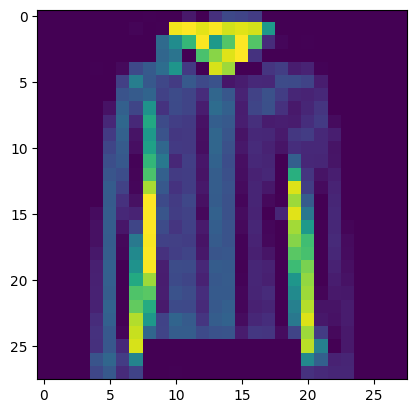

'Casaco'

In [ ]:
# Inferência de um exemplo específico de teste (valores de saídas da rede)
predictions = model.predict(X_teste)
plt.figure()
plt.imshow(X_teste[6])
plt.show()
nome_classes[np.argmax(predictions[6])]

In [ ]:
# Pós-processamento do exemplo de teste

x=0
n=0
for i in d_teste:
  previ=nome_classes[np.argmax(predictions[x])]

  l=nome_classes[i]
  if l != previ:
    print(f"a previsão foi {previ} e a saida desejada é {l}")
    print(x)
    n+=1
    print(f"{100-n*100/x}%")
    print("")
    print("")
    plt.figure()
    plt.imshow(X_teste[x])
    plt.show()

    print("")
    print("")
  x=x+1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Cálculo da Matriz de Confusão (Linhas: saídas desejadas. Colunas: saídas da rede)
matriz = tf.math.confusion_matrix(d_teste, predictions.argmax(axis=1))
print(matriz)

tf.Tensor(
[[870   1  10   8   6   2 101   0   2   0]
 [  0 983   1   8   1   0   6   0   1   0]
 [ 19   0 856  10  60   0  55   0   0   0]
 [ 21   1  13 917  10   0  35   0   3   0]
 [  0   0  58  35 855   1  50   0   0   1]
 [  0   0   0   0   0 992   0   5   0   3]
 [ 94   0  49  16  49   0 789   0   3   0]
 [  0   0   0   0   0   8   0 980   0  12]
 [  2   2   2   2   1   1   6   2 981   1]
 [  0   0   0   0   0   8   1  33   0 958]], shape=(10, 10), dtype=int32)


In [ ]:
# Instalação do Scikit-plot
! pip install -q scikit-plot

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

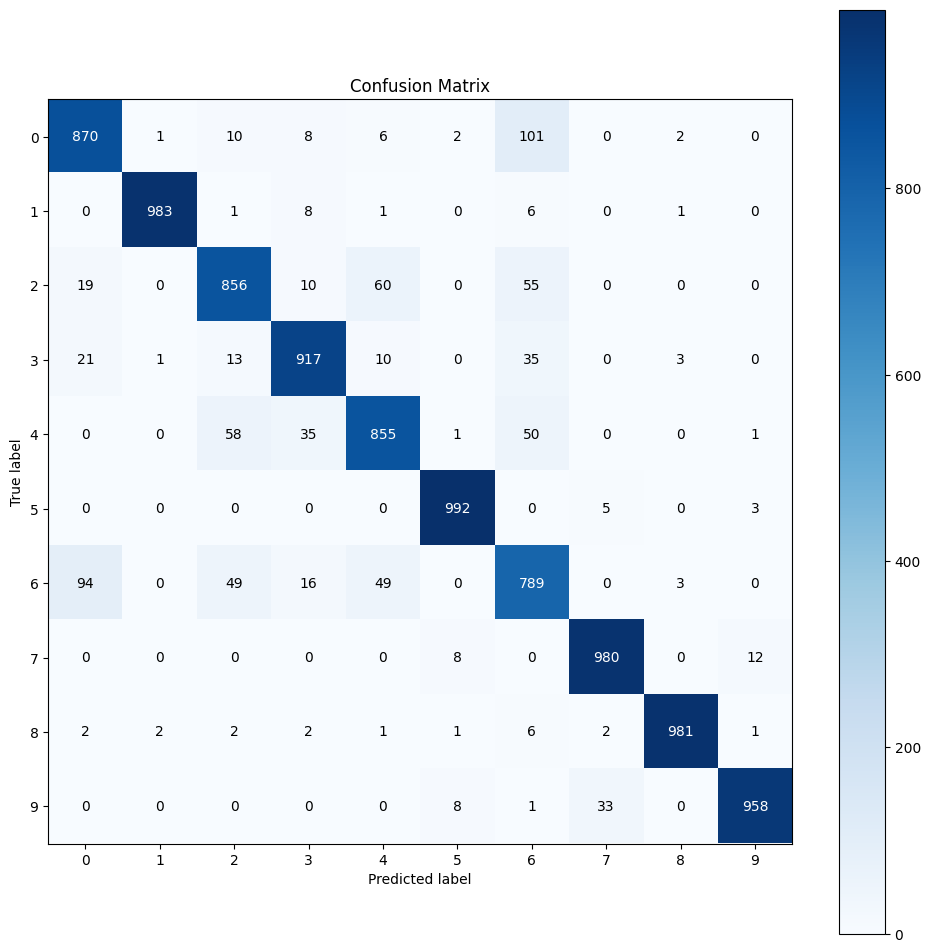

In [ ]:
# Importação da biblioteca para geração da Matriz de Confusão mais visual
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(d_teste,predictions.argmax(axis=1),figsize=(12,12))

In [ ]:
# Visualização da Matriz de Confusão simples para cálcula da Sensibilidade da rede
matriz = tf.math.confusion_matrix(d_teste, predictions.argmax(axis=1))
print(matriz)

In [ ]:
# Contagem de Verdadeiros Positivos de um elemento da diagonal principal da matriz
VP = (matriz[7][7])
tf.print(VP)

980


In [ ]:
# Cálculo dos Falsos Negativos de uma classe escolhida
FN = np.sum(matriz[7]) - VP
tf.print(FN)

20


In [ ]:
# Cálculo da sensibilidade e da exibição porcentagem com duas casas decimais
sensibilidade = (VP/(VP+FN))
tf.print('Sensibilidade = ', (np.around(sensibilidade*100, 2)), '%')

Sensibilidade =  98.0 %
